<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/GMM_on_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs
#make_blobs is used to create multiple datapoints close to each other.

In [ ]:
X, y_true= make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)

In [ ]:
#Fliiping the X-axes data for better ploting
X= X[:,::-1]

In [ ]:
from sklearn.cluster import  KMeans

In [ ]:
km= KMeans(n_clusters=4,random_state=0)

In [ ]:
labels_km= km.fit_predict(X)
labels_km

array([1, 0, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0,
       1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 0, 3, 0, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 2, 2, 3, 0,
       2, 3, 0, 1, 0, 3, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 3,
       0, 2, 0, 2, 3, 0, 0, 1, 3, 2, 2, 2, 1, 2, 3, 3, 0, 1, 3, 1, 2, 0,
       0, 0, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       1, 0, 3, 0, 1, 3, 1, 0, 3, 0, 0, 1, 0, 2, 3, 0, 2, 0, 2, 3, 2, 3,
       1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       3, 0, 3, 1, 3, 1, 0, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 0, 1, 1, 1, 2,
       2, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 1, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1,
       0, 3, 1, 0, 0, 0, 2, 1, 3, 1, 3, 0, 3, 3, 1, 2, 0, 2, 3, 0, 2, 3,
       3, 1, 2, 3, 1, 3, 2, 0, 0, 2, 0, 3, 1, 1, 3, 3, 2, 1, 3, 0, 0, 0,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 2, 2, 3, 0, 1,

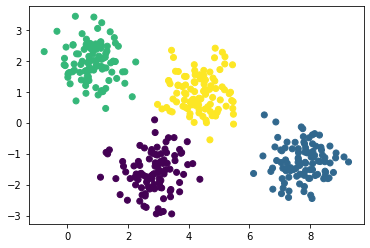

In [ ]:
plt.scatter(X[:,0],X[:,1], c=labels_km) #plotting the data as per predicted labels

In [ ]:
#Code to draw circles for KMeans clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels_k = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels_k, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels_k == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

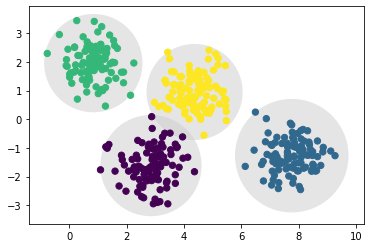

In [ ]:
#Drawing Concentric circle using defined plot_kmeans function
plot_kmeans(km,X) #Calling plot_means function and simply passing km instance and dataset X.

In [ ]:
#Measuring the cluster classification by silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,labels_km)

0.6783938627405857

In [ ]:
#Creating a straight line Dataset
rng= np.random.RandomState(13)
X_stretched= np.dot(X, rng.randn(2,2))

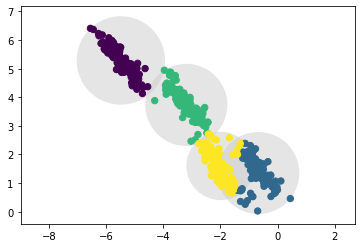

In [ ]:
plot_kmeans(km,X_stretched) #calling plot_means function and simply passing kmeans and datase X_stretched.

In [ ]:
silhouette_score(X_stretched,labels_km)

0.5501162205977507

In [ ]:
#In this scenario of straight line data KMeans algorithm fails to form clusters according to the labels.

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm= GaussianMixture(n_components=4)

In [ ]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
labels_gmm= gmm.predict(X)
labels_gmm

array([2, 3, 3, 3, 3, 2, 0, 3, 3, 0, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       2, 3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 1, 0, 3,
       0, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 3, 3, 2, 3, 3, 3, 2, 0, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 2, 3, 0, 0, 0, 2, 0, 3, 3, 3, 1, 3, 1, 0, 3,
       3, 3, 3, 3, 2, 0, 2, 3, 1, 2, 0, 3, 0, 2, 3, 1, 0, 0, 0, 3, 2, 1,
       2, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 0,
       3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 2, 1, 1, 0,
       0, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 1, 3, 3, 0, 0, 1, 0, 3, 2, 0, 1,
       3, 3, 1, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3,
       3, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 3, 1, 2, 3, 3, 0, 1, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 2,

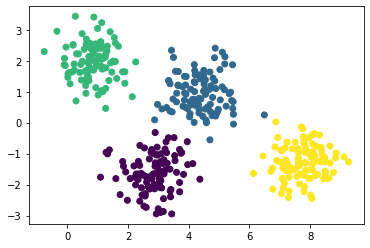

In [ ]:
plt.scatter(X[:,0],X[:,1], c=labels)

In [ ]:
#Code to draw ellipse or concentric circles for GMM 
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels_gmm = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gmm= GaussianMixture(n_components=4,random_state=42)

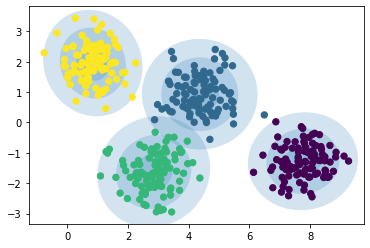

In [ ]:
#Drawing Concentric circles using defined plot_gmm function
plot_gmm(gmm,X)

In [ ]:
silhouette_score(X,labels_gmm)

0.47668538002299976

In [ ]:
#Running GMM on straight data
gmm.fit(X_stretched)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
labels_gmms= gmm.predict(X_stretched)
labels_gmms

array([2, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 2, 2, 3, 2, 2, 1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1,
       3, 2, 1, 0, 1, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 2, 3, 0, 2, 1, 1, 2,
       1, 3, 1, 3, 2, 1, 1, 0, 2, 3, 3, 3, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       1, 1, 2, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 3, 2, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 3, 2, 1, 3, 1, 3, 2, 3, 2,
       0, 1, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3,
       2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 3,
       3, 2, 2, 1, 3, 3, 0, 2, 1, 0, 2, 0, 2, 2, 3, 3, 0, 3, 2, 0, 3, 0,
       1, 2, 0, 1, 1, 1, 3, 0, 2, 0, 2, 1, 2, 2, 0, 3, 1, 3, 2, 1, 3, 2,
       2, 0, 3, 2, 0, 2, 3, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0,
       3, 2, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3, 2, 1, 0,

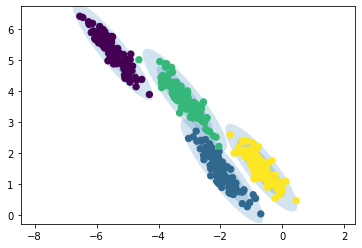

In [ ]:
#Drawing Concentric circles using defined plot_gmm function
plot_gmm(gmm, X_stretched)

In [ ]:
silhouette_score(X_stretched,labels_gmm)

0.32251456509224036